# Comprehensive data exploration with Python (by Pedro Marcelino)

<https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python>


In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [82]:
df_train = pd.read_csv('./input/train.csv')
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

# Understand the data

In order to understand our data, we can look at each variable and try to understand their meaning and relevance to this problem. I know this is time-consuming, but it will give us the flavour of our dataset.

In order to have some discipline in our analysis, we can create an **Excel** spreadsheet with the following columns:

1. **Variable**
  Variable name.

2. **Type**
  Identification of the variables' type. There are two possible values for this field: 'numerical' or 'categorical'. By 'numerical' we mean variables for which the values are numbers, and by 'categorical' we mean variables for which the values are categories.

3. **Segment**
  Identification of the variables' segment. We can define three possible segments: building, space or location.
  When we say 'building', we mean a variable that relates to the physical characteristics of the building (e.g. 'OverallQual').
  When we say 'space', we mean a variable that reports space properties of the house (e.g. 'TotalBsmtSF').
  Finally, when we say a 'location', we mean a variable that gives information about the place where the house is located (e.g. 'Neighborhood').

4. **Expectation**
  Our expectation about the variable influence in 'SalePrice'. We can use a categorical scale with 'High', 'Medium' and 'Low' as possible values.

5. **Conclusion**
  Our conclusions about the importance of the variable, after we give a quick look at the data. We can keep with the same categorical scale as in 'Expectation'.

6. **Comments**
  Any general comments that occured to us.

Lastly, make scattered plots for variable X against target (SalePrice) to validate our expectations.


In [83]:
# Analyse the target
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

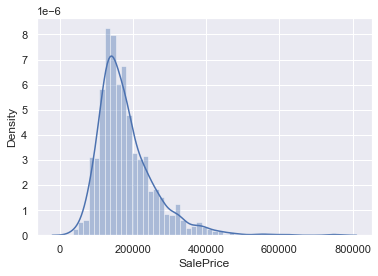

In [84]:
#histogram
sns.distplot(df_train['SalePrice'])

In [85]:
#skewness and kurtosis
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


# Skewness and Kurtosis

## Skewness

- +ve: more data is larger than the mean (skew to right)
- -ve: more data is smaller than the mean (skew to left)

## Kurtosis

A normal distribution has Kurtosis of 0

- +ve: data is more concentrated to the center (a high mountain)
- -ve: data is more spread-out from the center (a mushroom)


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


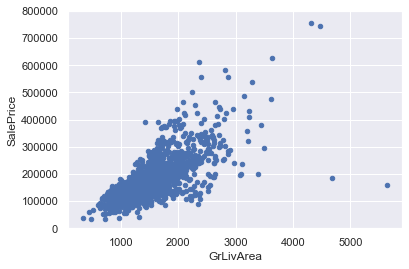

In [86]:
# Let's dive into Relationship with numerical variables

# SalePrice against GrLivArea (or anything you like, change the 'var')
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))
plt.show()

> A linear relatioship between GrLivArea and SalePrice

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


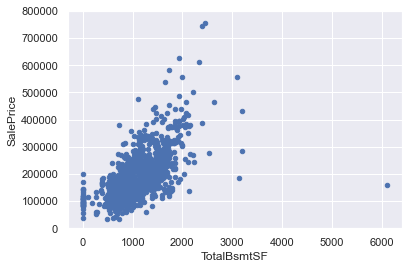

In [87]:
# SalePrice against TotalBsmtSF
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

> A strong linear (exponential?) relationship, but sometimes no effect on SalePrice at all (when x=0)

(-0.5, 9.5, 0.0, 800000.0)

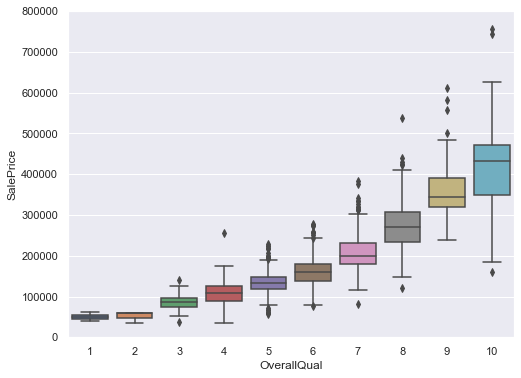

In [88]:
# box plot OverallQual/SalePrice
var = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6)) # config subplot size
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000)

# We could also make a scatter plot for fun
# data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))

(-0.5, 111.5, 0.0, 800000.0)

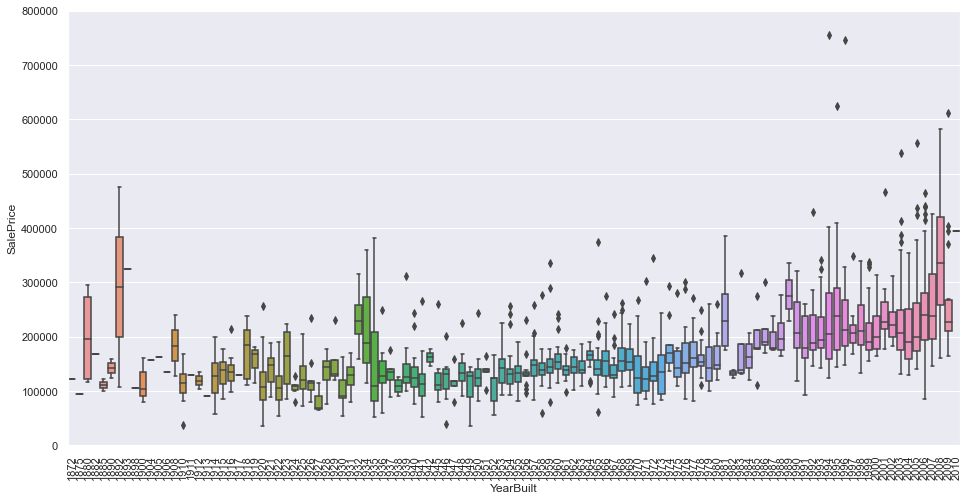

In [89]:
# box plot YearBuilt/SalePrice
var = 'YearBuilt'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
plt.xticks(rotation=90)
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000)

> Although it's not a strong tendency, I'd say that 'SalePrice' is more prone to spend more money in new stuff than in old relics.

# Now is time to analyse the data in a more subjective way

- Correlation matrix (heatmap style).
- 'SalePrice' correlation matrix (zoomed heatmap style).
- Scatter plots between the most correlated variables (move like Jagger style).

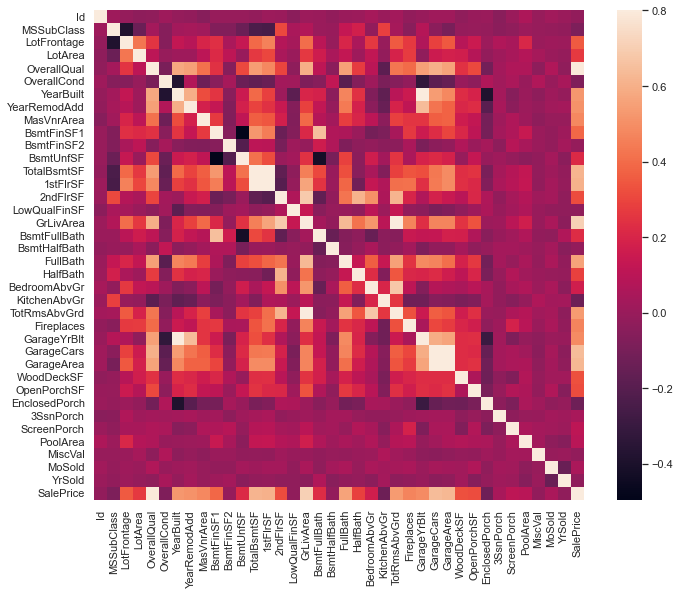

In [90]:
# Correlation matrix (heatmap style)
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12,9)) # config plot size
sns.heatmap(corrmat, vmax=0.8, square=True)
plt.show()

> Correlations between every pair of variables. Closer to white == higher correlation

# Quote:

> At first sight, there are two white colored squares that get my attention. The first one refers to the 'TotalBsmtSF' and '1stFlrSF' variables, and the second one refers to the 'GarageX' variables. Both cases show how significant the correlation is between these variables. Actually, this correlation is so strong that it can indicate a situation of multicollinearity. If we think about these variables, we can conclude that they give almost the same information so multicollinearity really occurs. Heatmaps are great to detect this kind of situations and in problems dominated by feature selection, like ours, they are an essential tool.


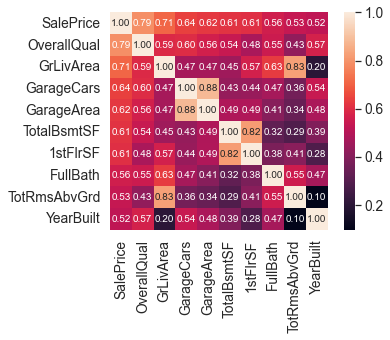

In [91]:
# 'SalePrice' correlation matrix (zoomed heatmap style)

k = 10 # no. of variables for the heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index # get names of top k features with highest correlation to SalePrice (1)
cm = np.corrcoef(df_train[cols].values.T) # .T means "Transpose" of the matrix (2)

sns.set_theme(font_scale=1.25)
hm = sns.heatmap(
  cm,
  cbar=True,
  annot=True,
  square=True,
  fmt='.2f',
  annot_kws={'size': 10},
  yticklabels=cols.values,
  xticklabels=cols.values
)
plt.show()

# Detailed Explanation for above (1) and (2)

## 1. Getting k features which have the largest correlation with SalesPrice

1. "corrmat" is the correlation matrix from the last cell, indicating the correlation of every pair of variables.
   It is a NxN matrix, where N is the number of features.

2. "corrmat.nlargest(k, 'SalePrice')" finds out k largest variables which have the highest correlation with 'SalePrice'.
   It is a kxN matrix.

3. Lastly, "corrmat.nlargest(k, 'SalePrice')['SalesPrice'].index" extracts the 'SalePrice' column only and return the feature names (indexes).
   It is a kx1 vector.

## 2. Generate a correlation matrix with the k features

1. "df_train[cols].values" gets the matrix values. It is a list of rows (kxk 2D array).

2. Use ".T" transpose the matrix and get a list of columns (kxk 2D array).

3. "np.corrcoef" accepts the list of columns and compile a kxk coefficient matrix.


# What can we get from this zoomed heatmap?

Quote again

> According to our crystal ball, these are the variables most correlated with 'SalePrice'. My thoughts on this:
> 'OverallQual', 'GrLivArea' and 'TotalBsmtSF' are strongly correlated with 'SalePrice'. Check!
'GarageCars' and 'GarageArea' are also some of the most strongly correlated variables. However, as we discussed in the last sub-point, the number of cars that fit into the garage is a consequence of the garage area. 'GarageCars' and 'GarageArea' are like twin brothers. You'll never be able to distinguish them. Therefore, we just need one of these variables in our analysis (we can keep 'GarageCars' since its correlation with 'SalePrice' is higher).
'TotalBsmtSF' and '1stFloor' also seem to be twin brothers. We can keep 'TotalBsmtSF' just to say that our first guess was right (re-read 'So... What can we expect?').
'FullBath'?? Really?
'TotRmsAbvGrd' and 'GrLivArea', twin brothers again. Is this dataset from Chernobyl?
Ah... 'YearBuilt'... It seems that 'YearBuilt' is slightly correlated with 'SalePrice'. Honestly, it scares me to think about 'YearBuilt' because I start feeling that we should do a little bit of time-series analysis to get this right. I'll leave this as a homework for you.
Let's proceed to the scatter plots.

# Scattered plots (final showcase of variable relationships)

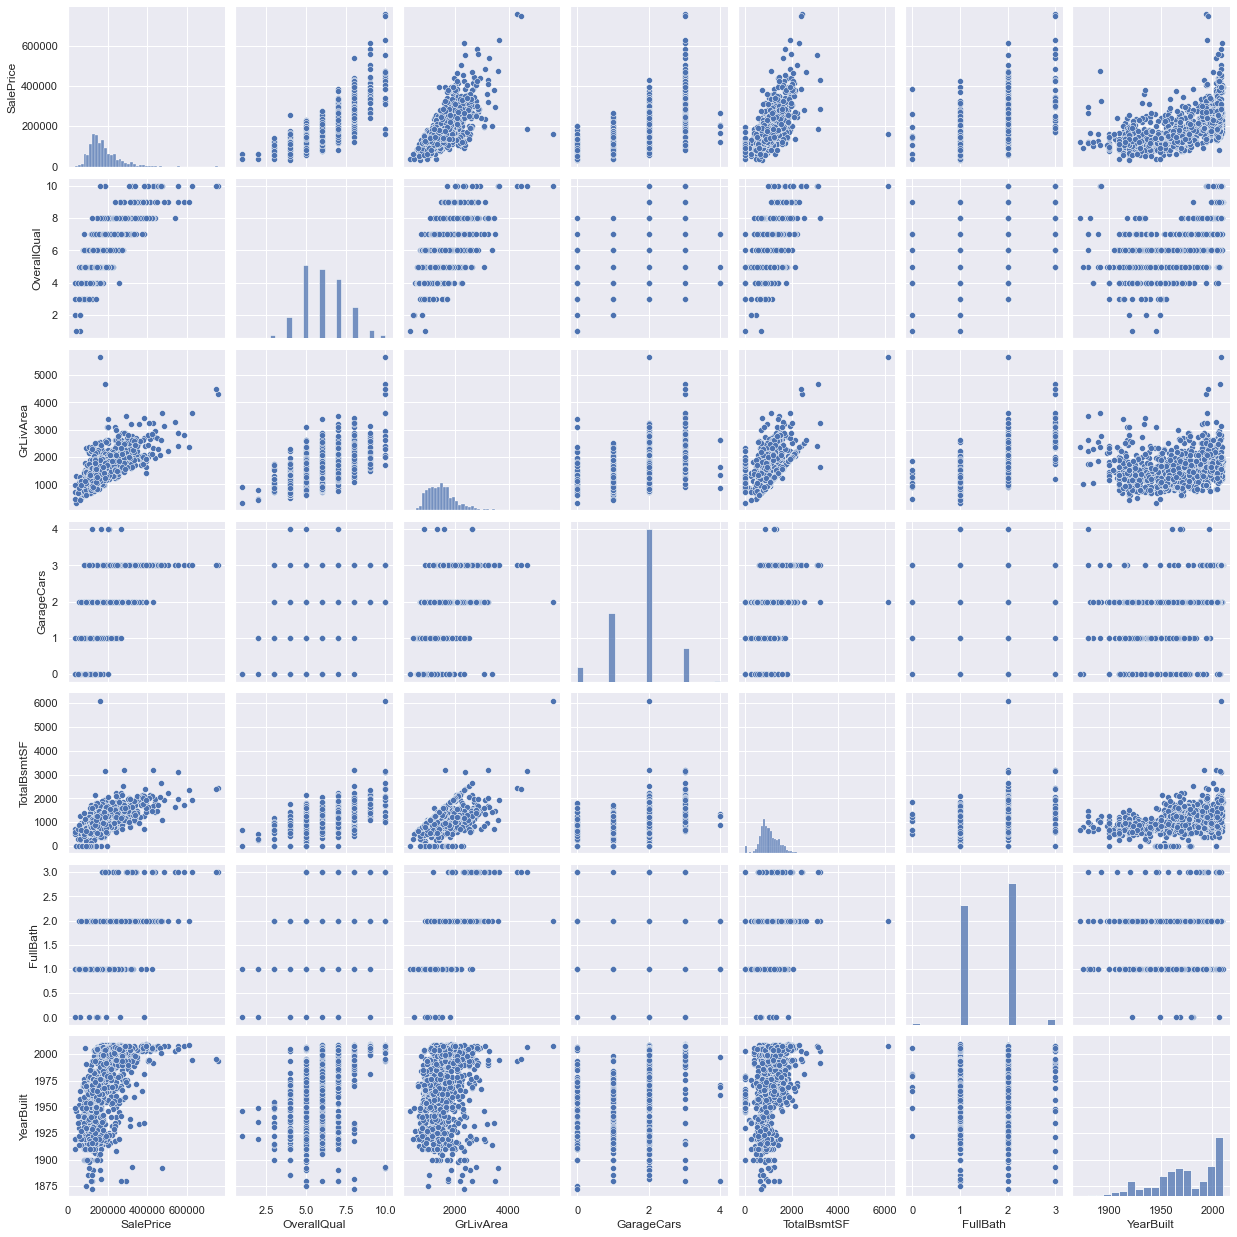

In [92]:
sns.set_theme()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], size=2.5)
plt.show()

# Dealing with Missing Data

Important questions when thinking about missing data:

- How prevalent is the missing data?
- Is missing data random or does it have a pattern?

In [93]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum() / df_train.isnull().count()).sort_values( # df_train.isnull() is used as dummy array in the second half
    ascending=False
)
missing_data = pd.concat([total, percent], axis=1, keys=["Total", "Percent"])
missing_data.head(20)


,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


# Delete useless data (more than 15% NA)

Quote:
> We'll consider that when more than 15% of the data is missing, we should delete the corresponding variable and pretend it never existed. This means that we will not try any trick to fill the missing data in these cases. According to this, there is a set of variables (e.g. 'PoolQC', 'MiscFeature', 'Alley', etc.) that we should delete. The point is: will we miss this data? I don't think so. None of these variables seem to be very important, since most of them are not aspects in which we think about when buying a house (maybe that's the reason why data is missing?). Moreover, looking closer at the variables, we could say that variables like 'PoolQC', 'MiscFeature' and 'FireplaceQu' are strong candidates for outliers, so we'll be happy to delete them.
> In what concerns the remaining cases, we can see that 'GarageX' variables have the same number of missing data. I bet missing data refers to the same set of observations (although I will not check it; it's just 5% and we should not spend 20 𝑖𝑛5  problems). Since the most important information regarding garages is expressed by 'GarageCars' and considering that we are just talking about 5% of missing data, I'll delete the mentioned 'GarageX' variables. The same logic applies to 'BsmtX' variables.
> Regarding 'MasVnrArea' and 'MasVnrType', we can consider that these variables are not essential. Furthermore, they have a strong correlation with 'YearBuilt' and 'OverallQual' which are already considered. Thus, we will not lose information if we delete 'MasVnrArea' and 'MasVnrType'.
> Finally, we have one missing observation in 'Electrical'. Since it is just one observation, we'll delete this observation and keep the variable.
> In summary, to handle missing data, we'll delete all the variables with missing data, except the variable 'Electrical'. In 'Electrical' we'll just delete the observation with missing data.

In [94]:
# Dealing with missing data
df_train = df_train.drop((missing_data[missing_data['Total'] > 1].index), 1)
df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)
df_train.isnull().sum().max() #just checking that there's no missing data missing...

0

# Out liars

Quote:

> Outliers is also something that we should be aware of. Why? Because outliers can markedly affect our models and can be a valuable source of information, providing us insights about specific behaviours.

Outliers is a complex subject and it deserves more attention. Here, we'll just do a quick analysis through the standard deviation of 'SalePrice' and a set of scatter plots

They can provide useful info sometimes. Below is some more analysis

In [95]:
# Univariate analysis (analyse the one (uni) target variable: SalePrice)
# First, standardize the data (make mean = 0 and s.d. = 1)
saleprice_scaled = StandardScaler().fit_transform(df_train['SalePrice'][:, np.newaxis])
print('saleprice_scaled:')
print(saleprice_scaled)

indices_to_sort = saleprice_scaled.squeeze().argsort()
print('\nindices_to_sort:')
print(indices_to_sort)

saleprice_sorted = saleprice_scaled[indices_to_sort]

lowest_10 = saleprice_sorted[:10] # [0 to 10]
highest_10 = saleprice_sorted[-10:] # [n-10 to n]

print('\nouter range (low) of the distribution:')
print(lowest_10)
print('\nouter range (high) of the distribution:')
print(highest_10)

saleprice_scaled:
[[ 0.34704187]
 [ 0.0071701 ]
 [ 0.53585953]
 ...
 [ 1.07713679]
 [-0.48847623]
 [-0.42081658]]

indices_to_sort:
[ 495  916  968 ... 1169 1182  691]

outer range (low) of the distribution:
[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]

outer range (high) of the distribution:
[[3.82758058]
 [4.0395221 ]
 [4.49473628]
 [4.70872962]
 [4.728631  ]
 [5.06034585]
 [5.42191907]
 [5.58987866]
 [7.10041987]
 [7.22629831]]


# Take away

For now, we'll not consider any of these values as an outlier but we should be careful with those two 7.something values.

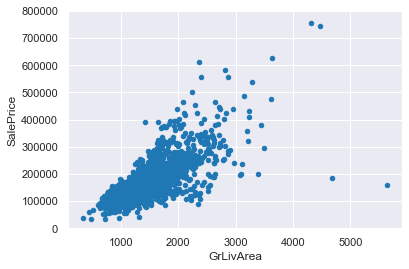

In [96]:
# Bivariate analysis: Saleprice against GrLivArea
# this time instead of seeing the 'trend', read the scatter plot again to look out for outliers
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0, 800000), c=['#1f77b4'])
plt.show()

# Take away 2

Quote:

> What has been revealed:
---
> The two values with bigger 'GrLivArea' seem strange and they are not following the crowd. We can speculate why this is happening. Maybe they refer to agricultural area and that could explain the low price. I'm not sure about this but I'm quite confident that these two points are not representative of the typical case. Therefore, we'll define them as outliers and delete them.
---
> The two observations in the top of the plot are those 7.something observations that we said we should be careful about. They look like two special cases, however they seem to be following the trend. For that reason, we will keep them.

In [97]:
# deleting the 2 outlier rows
df_train.sort_values(by='GrLivArea', ascending=False)[:2]
outlier_1 = df_train[df_train['Id'] == 1299].index
outlier_2 = df_train[df_train['Id'] == 524].index

df_train = df_train.drop(outlier_1)
df_train = df_train.drop(outlier_2)

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

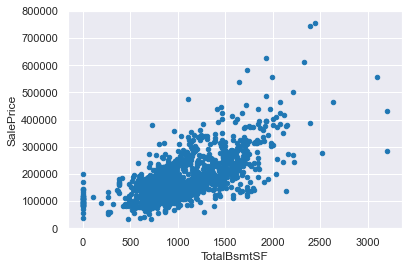

In [98]:
# Let's try again with another var: TotalBsmtSF
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000), c=['#1f77b4'])

Quote:
> We can feel tempted to eliminate some observations (e.g. TotalBsmtSF > 3000) but I suppose it's not worth it. We can live with that, so we'll not do anything.

# Getting hardcore

In Ayn Rand's novel, 'Atlas Shrugged', there is an often-repeated question: who is John Galt? A big part of the book is about the quest to discover the answer to this question.
<br>
I feel Randian now. Who is 'SalePrice'?
<br>
The answer to this question lies in testing for the assumptions underlying the statistical bases for multivariate analysis. We already did some data cleaning and discovered a lot about 'SalePrice'. Now it's time to go deep and understand how 'SalePrice' complies with the statistical assumptions that enables us to apply multivariate techniques.
<br>

# 4 assumptions should be tested (quotes below)

## Normality

Means that the data should look like a normal distribution
<br>
In this exercise we'll just check univariate normality for 'SalePrice' (which is a limited approach). Remember that univariate normality doesn't ensure multivariate normality (which is what we would like to have), but it helps. Another detail to take into account is that in big samples (>200 observations) normality is not such an issue. However, if we solve normality, we avoid a lot of other problems (e.g. heteroscedacity) so that's the main reason why we are doing this analysis.

## Homoscedasticity

Also known as homogeneity of variance.
<br>

Homoscedasticity refers to the 'assumption that dependent variable(s) exhibit equal levels of variance across the range of predictor variable(s)' (Hair et al., 2013). Homoscedasticity is desirable because we want the error term to be the same across all values of the independent variables.

## Linearity

The most common way to assess linearity is to examine scatter plots and search for linear patterns. If patterns are not linear, it would be worthwhile to explore data transformations. However, we'll not get into this because most of the scatter plots we've seen appear to have linear relationships.

## Absence of correlated errors

Correlated errors, like the definition suggests, happen when one error is correlated to another. For instance, if one positive error makes a negative error systematically, it means that there's a relationship between these variables. This occurs often in time series, where some patterns are time related. We'll also not get into this. However, if you detect something, try to add a variable that can explain the effect you're getting. That's the most common solution for correlated errors.


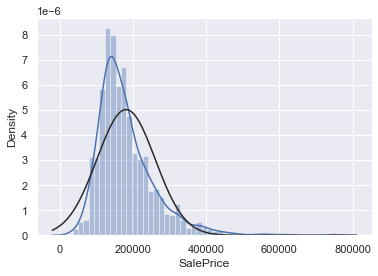

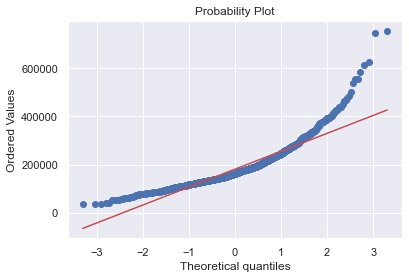

In [99]:
# histogram and normal probability plot
sns.distplot(df_train['SalePrice'], fit=norm)
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

Quote:
<br>
<br>
Ok, 'SalePrice' is not normal. It shows 'peakedness', positive skewness and does not follow the diagonal line.
<br>
But everything's not lost. A simple data transformation can solve the problem. This is one of the awesome things you can learn in statistical books: in case of positive skewness, log transformations usually works well. When I discovered this, I felt like an Hogwarts' student discovering a new cool spell.

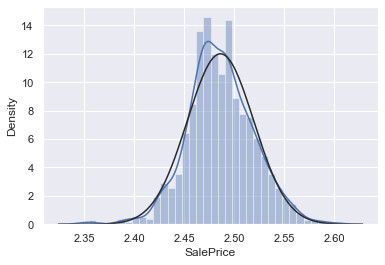

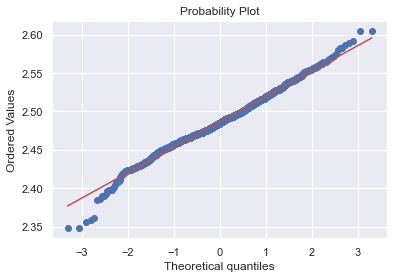

In [134]:
# applying log transformation
transformed_sp = np.log(df_train['SalePrice'])

# transformed historgram and normal probability plot
sns.distplot(transformed_sp, fit=norm)
fig = plt.figure()
res = stats.probplot(transformed_sp, plot=plt)

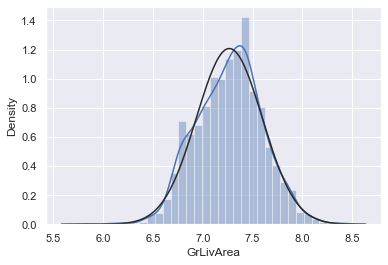

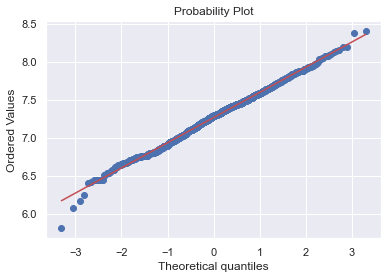

In [135]:
# Similarly with 'GrLivArea'
sns.distplot(df_train['GrLivArea'], fit=norm)
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

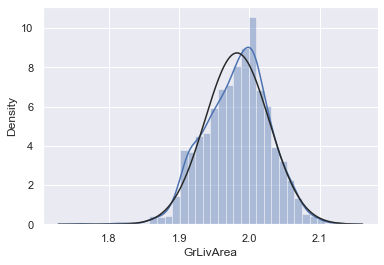

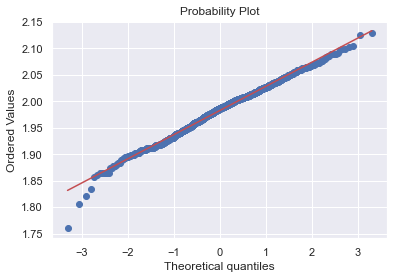

In [136]:
# applying log transformation
transformed_gr = np.log(df_train['GrLivArea'])

# transformed historgram and normal probability plot
sns.distplot(transformed_gr, fit=norm)
fig = plt.figure()
res = stats.probplot(transformed_gr, plot=plt)

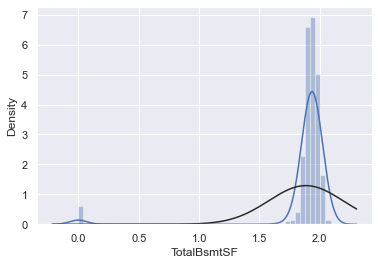

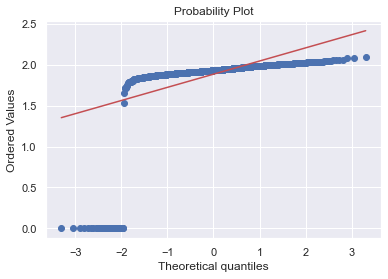

In [137]:
# Lastly...
sns.distplot(df_train['TotalBsmtSF'], fit=norm)
fig = plt.figure()
res = stats.probplot(df_train['TotalBsmtSF'], plot=plt)

What are we dealing with here?

- Something that, in general, presents skewness.
- A significant number of observations with value zero (houses without basement).
- A big problem because the value zero doesn't allow us to do log transformations.
<br>
To apply a log transformation here, we'll create a variable that can get the effect of having or not having basement (binary variable). Then, we'll do a log transformation to all the non-zero observations, ignoring those with value zero. This way we can transform data, **without losing the effect of having or not basement**.



In [138]:
# create a column for the new binary variable
# first, generate the column and fill with zeros
df_train['HasBsmt'] = pd.Series(len(df_train['TotalBsmtSF']), index=df_train.index)
df_train['HasBsmt'] = 0

# then, mark '1' in 'HasBsmt' if TotalBsmtSF is greater than 0
df_train.loc[df_train['TotalBsmtSF'] > 0, 'HasBsmt'] = 1

In [139]:
# now we can transform the data
df_train.loc[df_train.HasBsmt==1, 'TotalBsmtSF'] = np.log(df_train.TotalBsmtSF)

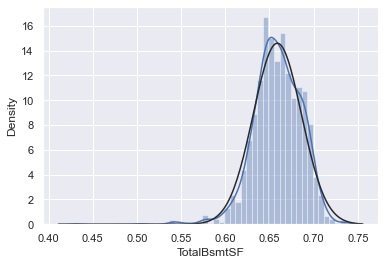

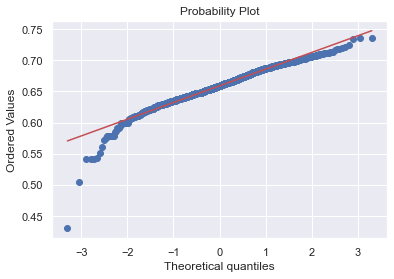

In [140]:
data_with_basement = df_train[df_train.TotalBsmtSF > 0]

sns.distplot(data_with_basement['TotalBsmtSF'], fit=norm)
fig = plt.figure()
res = stats.probplot(data_with_basement['TotalBsmtSF'], plot=plt)

# Homoscedasticity

Quote:
<br>
The best approach to test homoscedasticity for two metric variables is graphically. Departures from an equal dispersion are shown by such shapes as **cones** (small dispersion at one side of the graph, large dispersion at the opposite side) or **diamonds** (a large number of points at the center of the distribution).

Starting by 'SalePrice' and 'GrLivArea'...

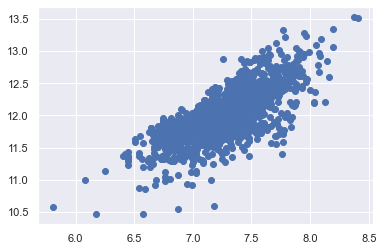

In [141]:
# Let's revisit this scatter plot
plt.scatter(df_train.GrLivArea, df_train.SalePrice)
plt.show()

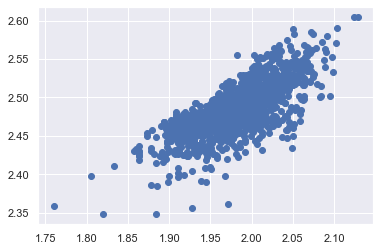

In [142]:
# and compare to the transformed version
plt.scatter(transformed_gr, transformed_sp)
plt.show()

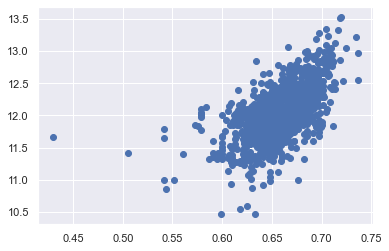

In [143]:
# The columns 'SalePrice' and 'GrLivArea' are not replaced by transformed data yet,
# let's replace them too and check the scatter plot of 'TotalBsmtSF'
df_train['SalePrice'] = transformed_sp
df_train['GrLivArea'] = transformed_gr

plt.scatter(data_with_basement['TotalBsmtSF'], data_with_basement['SalePrice'])
plt.show()

# Last but not the least, dummy variables

My notes: my first thinking was mapping categorical variables into numbers 1-10, e.g. OveralQuality GOOD, NEUTRAL, BAD --> 0,1,2<br>
but that is gonna screw the machine learning badly, since OveralQuality is not a continuous variable
<br>
Instead, create new columns of binary variables for each of the category<br>
(in the above example, GOOD, NEUTRAL, BAD --> OveralQuality_GOOD, OveralQuality_NEUTRAL, OveralQuality_BAD)<br>
<br>
Then fill in 0/1 for each row

Basically this is what pd.get_dummies() do for us automatically

In [145]:
# convert categorical variable into dummy (see: https://www.geeksforgeeks.org/convert-a-categorical-variable-into-dummy-variables/)
df_train = pd.get_dummies(df_train)
df_train

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,0,0,1,0,0,0,0,1,0
1,2,20,9600,6,8,1976,1976,978,0,284,...,0,0,0,1,0,0,0,0,1,0
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,0,0,1,0,0,0,0,1,0
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,0,0,1,1,0,0,0,0,0
4,5,60,14260,8,5,2000,2000,655,0,490,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,7917,6,5,1999,2000,0,0,953,...,0,0,0,1,0,0,0,0,1,0
1456,1457,20,13175,6,6,1978,1988,790,163,589,...,0,0,0,1,0,0,0,0,1,0
1457,1458,70,9042,7,9,1941,2006,275,0,877,...,0,0,0,1,0,0,0,0,1,0
1458,1459,20,9717,5,6,1950,1996,49,1029,0,...,0,0,0,1,0,0,0,0,1,0
